# Multi Linear Regression on 50 Startups Data

## Prepare a prediction model for profit of 50_startups data.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
start_df = pd.read_csv('50_Startups.csv')
start_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# Use one hot-endcoding to replace categorical data with numerical
# Use pd.concat to join the new columns with your original dataframe
start_df = pd.concat([start_df, pd.get_dummies(start_df['State'])], axis = 1)

# Now, drop the original 'State' column which don't need anymore
start_df.drop(['State'], axis = 1, inplace = True)

start_df

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [4]:
# Change column position
start_df = start_df.reindex(columns = ['California', 'Florida', 'New York', 'R&D Spend','Administration', 
                                       'Marketing Spend', 'Profit'])
start_df

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


#### EDA on dataset

In [5]:
# Check first 5 records
start_df.head(5)

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [6]:
# Check last 5 records
start_df.tail(5)

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
45,0,0,1,1000.23,124153.04,1903.93,64926.08
46,0,1,0,1315.46,115816.21,297114.46,49490.75
47,1,0,0,0.00,135426.92,0.00,42559.73
48,0,0,1,542.05,51743.15,0.00,35673.41
49,1,0,0,0.00,116983.80,45173.06,14681.40


In [7]:
# Check for data types, non-null values & memory usage
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   California       50 non-null     uint8  
 1   Florida          50 non-null     uint8  
 2   New York         50 non-null     uint8  
 3   R&D Spend        50 non-null     float64
 4   Administration   50 non-null     float64
 5   Marketing Spend  50 non-null     float64
 6   Profit           50 non-null     float64
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [8]:
# Get central tendency, dispersion and shape of dataset’s distribution
start_df.describe()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.340000,0.320000,0.340000,73721.615600,121344.639600,211025.097800,112012.639200
std,0.478518,0.471212,0.478518,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,0.000000,0.000000,0.000000,51283.140000,0.000000,14681.400000
25%,0.000000,0.000000,0.000000,39936.370000,103730.875000,129300.132500,90138.902500
50%,0.000000,0.000000,0.000000,73051.080000,122699.795000,212716.240000,107978.190000
75%,1.000000,1.000000,1.000000,101602.800000,144842.180000,299469.085000,139765.977500
max,1.000000,1.000000,1.000000,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# Checking Null values
start_df.isnull().sum()

California         0
Florida            0
New York           0
R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [10]:
# Check for the column labels of the DataFrame
start_df.columns

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')

In [11]:
# Check the dimensions of the DataFrame
start_df.shape

(50, 7)

In [12]:
# Check for the random sample from the DataFrame
start_df.sample(5)

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
28,0,1,0,66051.52,182645.56,118148.20,103282.38
23,0,1,0,67532.53,105751.03,304768.73,108733.99
32,1,0,0,63408.86,129219.61,46085.25,97427.84
3,0,0,1,144372.41,118671.85,383199.62,182901.99
39,1,0,0,38558.51,82982.09,174999.30,81005.76


In [13]:
# Check for the Correlation
start_df.corr()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


#### Visualize data

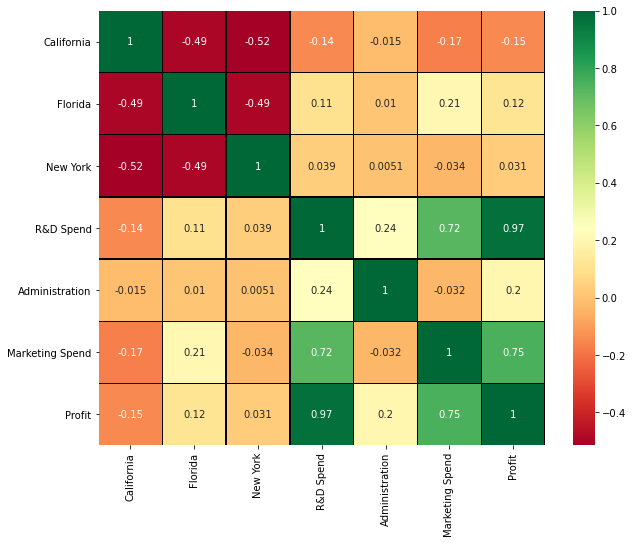

In [14]:
#corrolation plot
corrmat = start_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10, 8))
x = sns.heatmap(start_df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn', linecolor = 'black', linewidths = 0.25)

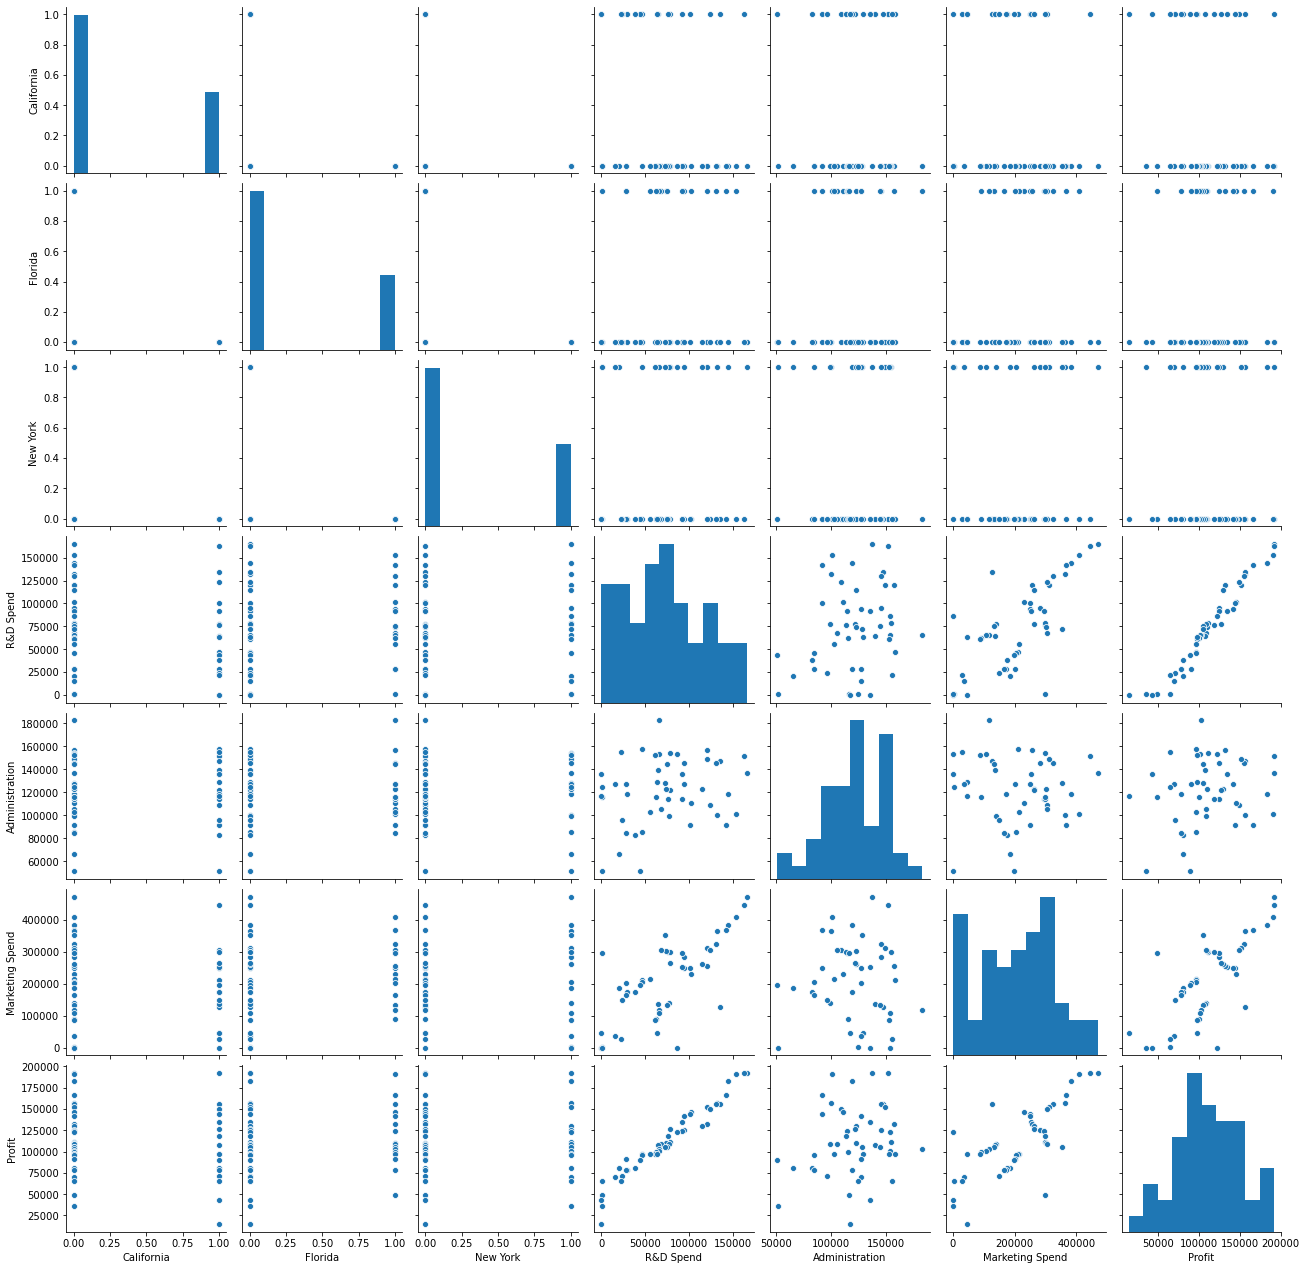

In [15]:
# Basic plotting & visualization
sns.pairplot(start_df)

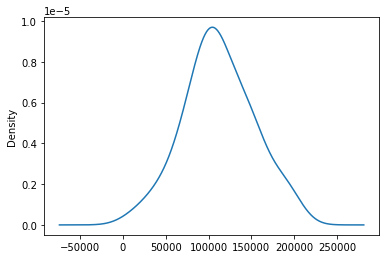

In [16]:
start_df['Profit'].plot.density()

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


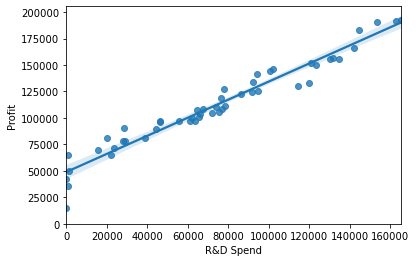

In [17]:
sns.regplot(x = 'R&D Spend', y = 'Profit', data = start_df)
plt.ylim(0,)
start_df[['R&D Spend','Profit']].corr()

,Administration,Profit
Administration,1.000000,0.200717
Profit,0.200717,1.000000


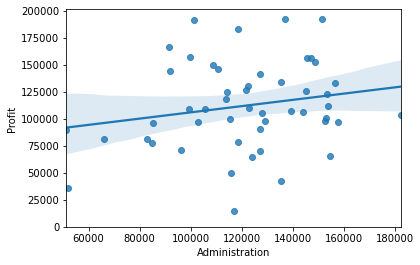

In [18]:
sns.regplot(x = 'Administration', y = 'Profit', data = start_df)
plt.ylim(0,)
start_df[['Administration','Profit']].corr()

,Marketing Spend,Profit
Marketing Spend,1.000000,0.747766
Profit,0.747766,1.000000


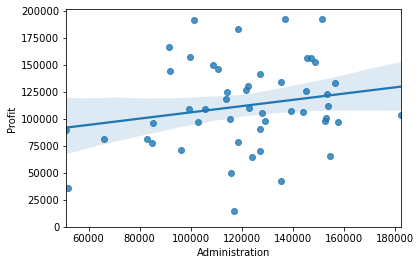

In [19]:
sns.regplot(x = 'Administration', y = 'Profit', data = start_df)
plt.ylim(0,)
start_df[['Marketing Spend','Profit']].corr()

<Figure size 432x288 with 0 Axes>

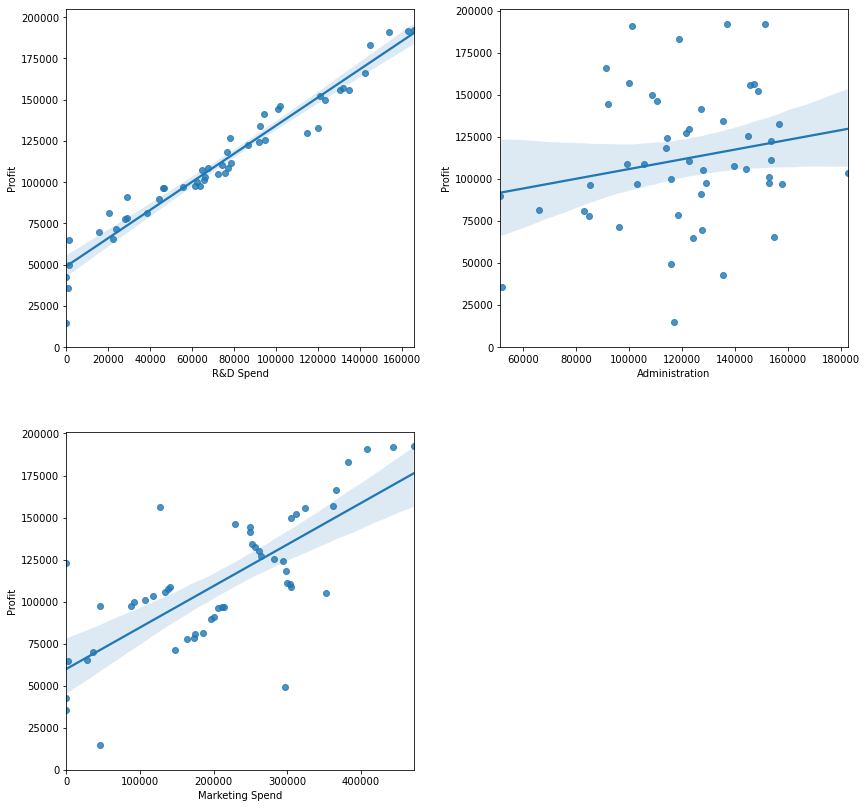

In [20]:
fig = plt.figure()
fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

ax = fig.add_subplot(2, 2, 1)
sns.regplot(x = 'R&D Spend', y = 'Profit', data = start_df, ax = ax)
plt.ylim(0,)
start_df[['R&D Spend', 'Profit']].corr()

ax = fig.add_subplot(2, 2, 2)
sns.regplot(x = 'Administration', y = 'Profit', data = start_df, ax = ax)
plt.ylim(0,)
start_df[['Administration', 'Profit']].corr()

ax = fig.add_subplot(2, 2, 3)
sns.regplot(x = 'Marketing Spend', y = 'Profit', data = start_df, ax = ax)
plt.ylim(0,)
start_df[['Marketing Spend', 'Profit']].corr()

plt.show()

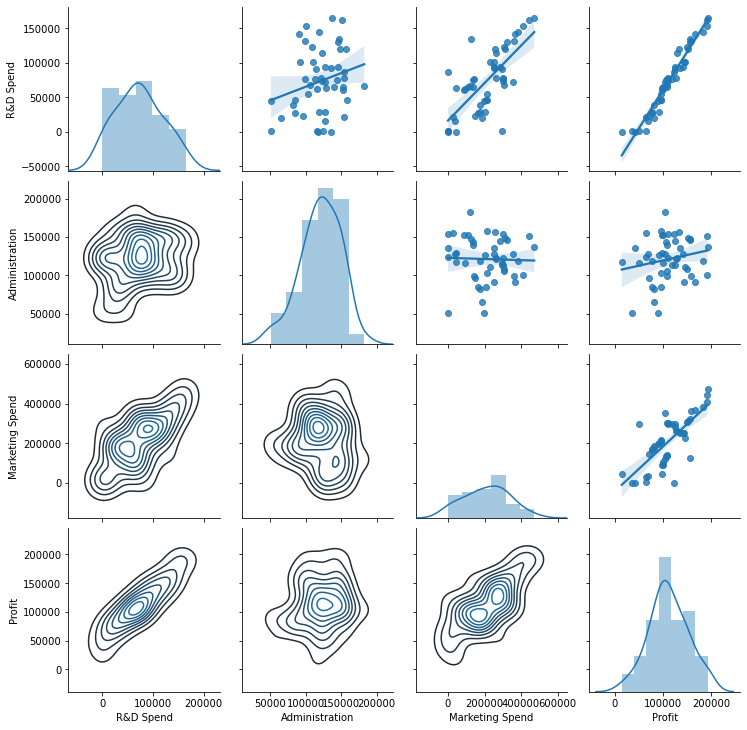

In [21]:
#map_df = start_df.filter(['R&D Spend','Administration','Marketing Spend','Profit'], axis = 1)

map_df = start_df[['R&D Spend','Administration','Marketing Spend','Profit']].copy()

grids = sns.PairGrid(map_df)
grids.map_diag(sns.distplot)
grids.map_upper(sns.regplot)
grids.map_lower(sns.kdeplot)

In [22]:
l = start_df.columns
l

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')

Text(0.5, 1.0, 'New York Vs Price')

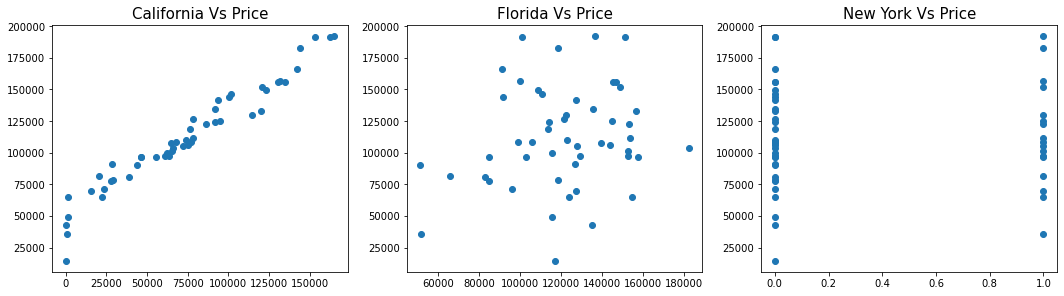

In [23]:
from matplotlib import gridspec
fig = plt.figure(figsize = (18, 10))
gs = gridspec.GridSpec(2, 3)
ax0 = plt.subplot(gs[0])
ax0.scatter(start_df[l[3]], start_df['Profit'])
ax0.set_title(l[0]+" Vs Price", fontdict = {'fontsize':15})

ax1 = plt.subplot(gs[1])
ax1.scatter(start_df[l[4]], start_df['Profit'])
ax1.set_title(l[1]+" Vs Price", fontdict = {'fontsize':15})

ax2 = plt.subplot(gs[2])
ax2.scatter(start_df[l[2]], start_df['Profit'])
ax2.set_title(l[2]+" Vs Price", fontdict = {'fontsize':15})

In [24]:
# Trains and Tests Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
l_column = list(start_df.columns)
l_column

['California',
 'Florida',
 'New York',
 'R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit']

In [26]:
len_feature = len(l_column)
len_feature

7

In [27]:
# Put Price in the Y & all the other columns in the X
X = start_df[l_column[0 : len_feature-1]]
X

,California,Florida,New York,R&D Spend,Administration,Marketing Spend
0,0,0,1,165349.20,136897.80,471784.10
1,1,0,0,162597.70,151377.59,443898.53
2,0,1,0,153441.51,101145.55,407934.54
3,0,0,1,144372.41,118671.85,383199.62
4,0,1,0,142107.34,91391.77,366168.42
5,0,0,1,131876.90,99814.71,362861.36
6,1,0,0,134615.46,147198.87,127716.82
7,0,1,0,130298.13,145530.06,323876.68
8,0,0,1,120542.52,148718.95,311613.29
9,1,0,0,123334.88,108679.17,304981.62


In [28]:
Y = start_df[l_column[-1]]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [29]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [30]:
print("Training feature test size : X_Train", X_Train.shape)
print("Training feature test size : Y_Train", Y_Train.shape)
print("Testing target test size : X_Test", X_Test.shape)
print("Testing target test size : Y_Test", Y_Test.shape)

Training feature test size : X_Train (35, 6)
Training feature test size : Y_Train (35,)
Testing target test size : X_Test (15, 6)
Testing target test size : Y_Test (15,)


In [31]:
# Model fitting & training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_Train, Y_Train)

LinearRegression()

In [34]:
lm.intercept_

44464.22477045893

In [35]:
lm.coef_

array([-6.81141882e+02, -1.22272683e+03,  1.90386871e+03,  7.56806466e-01,
        1.60326273e-02,  4.46260113e-02])

In [36]:
# Calculation of standard errors and t-statistic for the co-efficients
n = X_Train.shape[0]
print("Number of Rows of X Train Data:", n)
k = X_Train.shape[1]
print("Number of Columns of X Train Data:", k)
dfN = n - k
print("Degree of Freedom:", dfN)

Number of Rows of X Train Data: 35
Number of Columns of X Train Data: 6
Degree of Freedom: 29


In [37]:
# Predictions for Train Data
train_pred = lm.predict(X_Train)
train_pred

array([189074.47498224, 153720.41038065, 118750.78082   ,  47674.53404394,
       112540.53223876,  99021.5419092 , 146688.20119257,  91726.76780386,
       108543.8722571 , 158638.51888937, 116646.29322813,  47607.89907025,
       174633.3590682 , 109646.63298201,  64313.75461836, 168595.13802015,
       116570.14746925,  75946.94946725, 147972.33249007,  61730.951432  ,
       101115.87881458,  86750.34662023,  82104.35425693, 152476.24346394,
        95899.6489057 ,  96470.25593563, 114745.51822747,  69821.56328386,
       114232.31578949, 132941.38339419,  71002.93904098,  90853.93993214,
       101430.48650015, 179193.14523096,  49200.53824042])

In [38]:
# Training Error
train_error = np.square(train_pred - Y_Train)
train_error

sum_error = np.sum(train_error)
print(sum_error)

3221130909.7589836


In [39]:
# R-Squared of the Model Fit
round(metrics.r2_score(Y_Train, train_pred), 2)

0.94

In [40]:
# Predictions for Test Data
test_pred = lm.predict(X_Test)
test_pred

array([132369.62919453, 126851.28848932,  96080.1785802 ,  59352.91795666,
       127669.47747381, 194754.11125531,  75156.33193455, 127468.80878188,
       103253.40952771, 153885.86580655, 121535.22306969,  45954.33222778,
       132589.02096048,  73048.84813277, 163966.73137975])

In [41]:
# Testing Error
test_error = np.square(test_pred - Y_Test)
test_error

sum_error = np.sum(test_error)
print(sum_error)

914735698.9043443


In [42]:
# R-Squared of the Model Fit
round(metrics.r2_score(Y_Test, test_pred), 2)

0.96

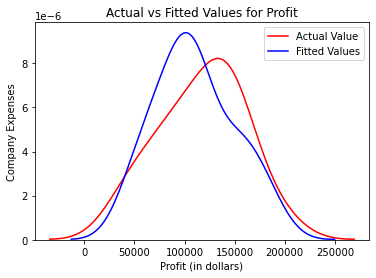

In [43]:
ax1 = sns.distplot(Y_Test, hist = False, color = "r", label = "Actual Value")
sns.distplot(train_pred, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Profit')
plt.xlabel('Profit (in dollars)')
plt.ylabel('Company Expenses')

plt.show()
#plt.close()